In [1]:
# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
np.random.seed(1337)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pickle
import plotting

from treecalculator import TreeCalculator
from treemodel import TreeModel
from keras.models import load_model
import tensorflow as tf
import pickle
import cv2
import plotting
%load_ext autoreload
%autoreload 2

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import_data = pickle.load(open('ManuallyTrained512x512Data.p', 'rb'))
X = np.array(import_data['X'])
y = np.array(import_data['y'])
y = keras.utils.to_categorical(y, 2)

In [3]:
print(len(X))
print(len(y))
print(X[0].shape)
print(y[0])

768622
768622
(10,)
[0. 1.]


In [4]:
perm = np.random.permutation(len(X))
X = X[perm]
y = y[perm]
test_set_size = 0.15
split_index = int(len(X) * (1 - test_set_size))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [5]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam',
              metrics=['accuracy']) # reporting the accuracy
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total para

Train on 653328 samples, validate on 115294 samples
Epoch 1/100
653328/653328 [==============================] - 15s 23us/step - loss: 0.1952 - acc: 0.9341 - val_loss: 0.1587 - val_acc: 0.9443
Epoch 2/100
653328/653328 [==============================] - 12s 19us/step - loss: 0.1694 - acc: 0.9416 - val_loss: 0.1613 - val_acc: 0.9408
Epoch 3/100
653328/653328 [==============================] - 13s 19us/step - loss: 0.1676 - acc: 0.9423 - val_loss: 0.1594 - val_acc: 0.9440
Epoch 4/100
653328/653328 [==============================] - 12s 18us/step - loss: 0.1671 - acc: 0.9423 - val_loss: 0.1677 - val_acc: 0.9435
Epoch 5/100
653328/653328 [==============================] - 11s 17us/step - loss: 0.1662 - acc: 0.9427 - val_loss: 0.1625 - val_acc: 0.9389
Epoch 6/100
653328/653328 [==============================] - 12s 18us/step - loss: 0.1657 - acc: 0.9428 - val_loss: 0.1606 - val_acc: 0.9427
Epoch 7/100
653328/653328 [==============================] - 12s 18us/step - loss: 0.1658 - acc: 0.943

653328/653328 [==============================] - 11s 18us/step - loss: 0.2005 - acc: 0.9396 - val_loss: 0.1808 - val_acc: 0.9383
Epoch 59/100
653328/653328 [==============================] - 11s 17us/step - loss: 0.2016 - acc: 0.9391 - val_loss: 0.1692 - val_acc: 0.9454
Epoch 60/100
653328/653328 [==============================] - 11s 17us/step - loss: 0.2024 - acc: 0.9388 - val_loss: 0.1784 - val_acc: 0.9461
Epoch 61/100
653328/653328 [==============================] - 11s 17us/step - loss: 0.2027 - acc: 0.9387 - val_loss: 0.1793 - val_acc: 0.9463
Epoch 62/100
653328/653328 [==============================] - 11s 18us/step - loss: 0.2040 - acc: 0.9390 - val_loss: 0.1862 - val_acc: 0.9454
Epoch 63/100
653328/653328 [==============================] - 11s 17us/step - loss: 0.2041 - acc: 0.9383 - val_loss: 0.1833 - val_acc: 0.9458
Epoch 64/100
653328/653328 [==============================] - 11s 18us/step - loss: 0.2068 - acc: 0.9390 - val_loss: 0.1759 - val_acc: 0.9430
Epoch 65/100
653328

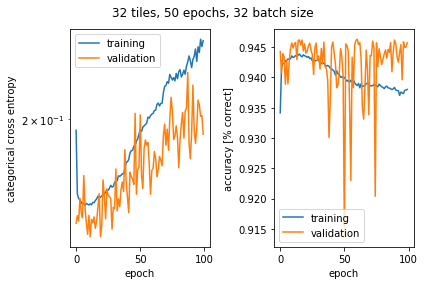

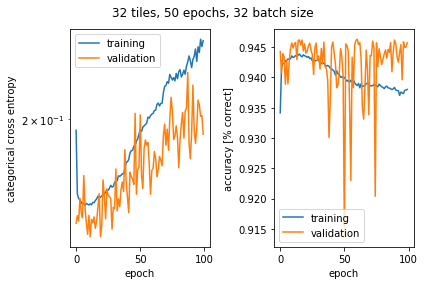

In [7]:
hist = model.fit(X_train,
                 y_train,
                 batch_size=256,
                 epochs = 100,
                 validation_data=(X_test, y_test))
plotting.plot_history(hist, "32 tiles, 50 epochs, 32 batch size")

In [8]:
model.save('NNModelOne128One256One128Layer.h5')